1. Write a program to enter a string from the user and perform the following tasks:
    * Write a python function named "Tokenize" which returns the tokenized string
    * Print tokens along with the frequency of each token using the above function
    * Print the 5 least occurring tokens

In [6]:
#import libraries
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from operator import itemgetter

import pandas as pd
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
%%writefile tokenizer_func.py

#import libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from operator import itemgetter

#define tokenize function
def Tokenize():
    text = input()
    tokens = word_tokenize(text) #tokenize the words
    fdist = FreqDist(tokens) #find the frequency of words
    for f in fdist:
        print(f, fdist[f])
    min_5 = dict(sorted(fdist.items(), key=itemgetter(1))[:5]) #find the least 5 occuring words
    print("Least 5 occurring tokens:", min_5)
    return tokens

Overwriting tokenizer_func.py


In [9]:
#run the Tokenize function
from tokenizer_func import Tokenize
Tokenize()

Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.
Natural 1
language 3
processing 1
( 1
NLP 1
) 1
is 1
a 1
subfield 1
of 2
linguistics 1
, 3
computer 1
science 1
and 3
artificial 1
intelligence 1
concerned 1
with 1
the 1
interactions 1
between 1
computers 2
human 1
in 1
particular 1
how 1
to 2
program 1
process 1
analyze 1
large 1
amounts 1
natural 1
data 1
. 1
Least 5 occurring tokens: {'Natural': 1, 'processing': 1, '(': 1, 'NLP': 1, ')': 1}


['Natural',
 'language',
 'processing',
 '(',
 'NLP',
 ')',
 'is',
 'a',
 'subfield',
 'of',
 'linguistics',
 ',',
 'computer',
 'science',
 ',',
 'and',
 'artificial',
 'intelligence',
 'concerned',
 'with',
 'the',
 'interactions',
 'between',
 'computers',
 'and',
 'human',
 'language',
 ',',
 'in',
 'particular',
 'how',
 'to',
 'program',
 'computers',
 'to',
 'process',
 'and',
 'analyze',
 'large',
 'amounts',
 'of',
 'natural',
 'language',
 'data',
 '.']

2. Write a program to enter a string from the user and perform the following tasks
    * Write a python function named "RemoveStopWords" which returns the string after removing stop words
    * Count frequency of each stop word present in a string using the above function
    * Plot a bar graph depicting stop words and their frequencies

In [10]:
%%writefile removestopwords.py
#Remove stop words function
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
def RemoveStopWords(token_list):
    stop_words = set(stopwords.words('english')) #copy stopwords to a list
    stop_removed = [w for w in token_list if w not in stop_words] #for loop to append the words to a list except stopwords
    return stop_removed

Writing removestopwords.py


In [11]:
#counting frequency of stop words in a string
import nltk
nltk.download('punkt')
from nltk import FreqDist
from nltk.tokenize import word_tokenize
string = input()
from removestopwords import RemoveStopWords

tokens = word_tokenize(string) #tokenize
stop_removed = RemoveStopWords(tokens) #remove stopwords

stop_present = [word for word in tokens if word not in stop_removed] #save stop words to a list
print(stop_present,'\n==========================================')

swfdist = FreqDist(stop_present) #find the frequency of stop words
print("Frequency Distribution of Stop Words:\n==========================================")
for f in swfdist:
    print("{}: {}".format(f, swfdist[f]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['is', 'a', 'of', 'and', 'with', 'the', 'between', 'and', 'in', 'how', 'to', 'to', 'and', 'of'] 
Frequency Distribution of Stop Words:
is: 1
a: 1
of: 2
and: 3
with: 1
the: 1
between: 1
in: 1
how: 1
to: 2


Text(0.5, 1.0, 'Frequency of Stop words in the input')

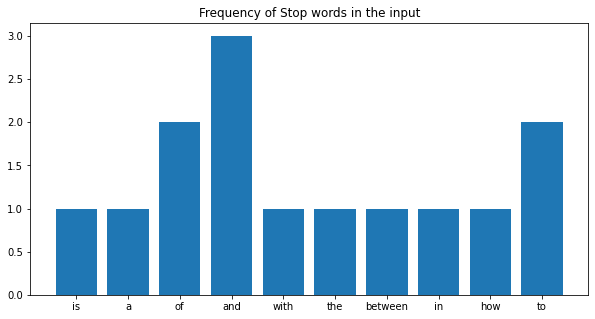

In [12]:
#plot a bar graph depicting frequency of stop words
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 5))
plt.bar(swfdist.keys(), swfdist.values())
plt.title("Frequency of Stop words in the input")

3. Write a program to enter a string from the user and perform the following tasks
    * Write a python function named "Lemmatize" which returns a string after lemmatizing the string
    * Write a python function named "Stemmed" which returns a string after stemming the string
    * Print all the words along with their lemmatized and stemmed from using the above functions
    * Save these results in a CSV file having 3 columns: Original Word, Lemmatized Form, Stemmed Form

In [13]:
%%writefile lemma_stem.py
#lemmatize and stemming
#import libraries
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer

#define lemmatize function
def Lemmatize(token_list):
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in token_list]
    return lemmatized

#define stemming function
def Stemmed(token_list):
    stemmer = PorterStemmer()
    stemmed = [stemmer.stem(word) for word in token_list]
    return stemmed

Writing lemma_stem.py


In [14]:
#implement lemmatizer and stemmer
text = "cries studies studied cried hurry hurried hurries jump jumped jumping jumps"
tokens = word_tokenize(text)

import lemma_stem
from lemma_stem import Lemmatize, Stemmed
lemma = Lemmatize(tokens)
stem = Stemmed(tokens)

#write the results to a Pandas dataframe
import pandas as pd
df = pd.DataFrame()
df['Original Word'] = tokens
df['Lemmatized Form'] = lemma
df['Stemmed Form'] = stem

print(df)
df.to_csv("StemmedAndLemmatizedResults.csv") #save the results to CSV file

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
   Original Word Lemmatized Form Stemmed Form
0          cries             cry          cri
1        studies           study        studi
2        studied         studied        studi
3          cried           cried          cri
4          hurry           hurry        hurri
5        hurried         hurried        hurri
6        hurries           hurry        hurri
7           jump            jump         jump
8         jumped          jumped         jump
9        jumping         jumping         jump
10         jumps            jump         jump


4. Create a python file named "PreProcess" and perform the following tasks:
    * Copy the function "Tokenize" in this file from question1
    * Copy the function "RemoveStopWords" in this file from question2
    * Copy the function "Lemmatize" in this file from question3

Create a function named "Refine" which accepts a string and calls the above 3 functions in the same order
    * Tokenize (inputted string will be the input)
    * RemoveStopWords (tokenized string should be input)
    * Lemmatize (stop words removed string shoulg be input)
    
Save this python file as PreProcess.

In [15]:
%%writefile PreProcess.py
#creating a PreProcess file
from tokenizer_func import Tokenize
from removestopwords import RemoveStopWords
from lemma_stem import Lemmatize

#defining Refine function to carry out the processing
def Refine():
    tokens = Tokenize()
    stop_remove = RemoveStopWords(tokens)
    lemmatized_words = Lemmatize(stop_remove)
    print('Tokenized: ', tokens)
    print('Stop Words Removed Copy: ', stop_remove)
    print('Lemmatized Words: ', lemmatized_words)

Writing PreProcess.py


In [16]:
#runt the refine function
from PreProcess import Refine
Refine()

Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.
Natural 1
language 3
processing 1
( 1
NLP 1
) 1
is 1
a 1
subfield 1
of 2
linguistics 1
, 3
computer 1
science 1
and 3
artificial 1
intelligence 1
concerned 1
with 1
the 1
interactions 1
between 1
computers 2
human 1
in 1
particular 1
how 1
to 2
program 1
process 1
analyze 1
large 1
amounts 1
natural 1
data 1
. 1
Least 5 occurring tokens: {'Natural': 1, 'processing': 1, '(': 1, 'NLP': 1, ')': 1}
Tokenized:  ['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of', 'linguistics', ',', 'computer', 'science', ',', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', 'language', ',', 'in', 'particular', 'how', 'to', 'prog